### Libraries

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading and Splitting

In [28]:
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

#Print the shapes of the datasets
print(f"Training set shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Labels: {y_test.shape}")

Training set shape: (48000, 28, 28), Labels: (48000,)
Validation set shape: (12000, 28, 28), Labels: (12000,)
Test set shape: (10000, 28, 28), Labels: (10000,)


###Data Analysis

Class Distribution

In [29]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts)) # Storing the values in a dictionary
print("Class Distribution:", class_distribution)

Class Distribution: {0: 4738, 1: 5394, 2: 4766, 3: 4905, 4: 4674, 5: 4337, 6: 4734, 7: 5012, 8: 4681, 9: 4759}


Visualizing class distribution

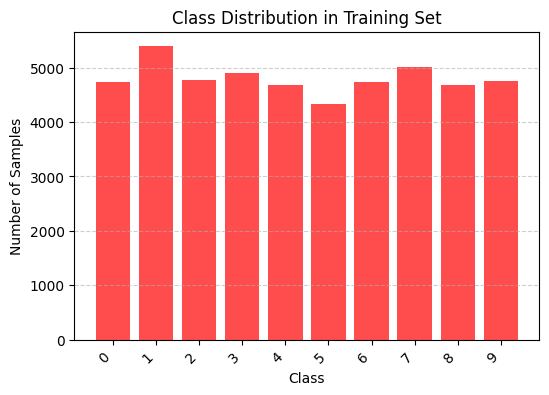

In [30]:
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)

# Plot class distribution
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color="red", alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.xticks(unique, class_names, rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Basic Statistics

In [31]:
import numpy as np

#Data type and pixel value range
print("Data type of X_train:", x_train.dtype)
print("Min pixel value - Training set:", np.min(x_train))
print("Max pixel value - Training set:", np.max(x_train))
print("Unique classes in y_train:", np.unique(y_train))

#Calculate the mean and standard deviation of the pixel values
#for each dataset
mean_train = np.mean(x_train)
std_train = np.std(x_train)

mean_val = np.mean(x_val)
std_val = np.std(x_val)

mean_test = np.mean(x_test)
std_test = np.std(x_test)

#Printing final results
print("\nMean pixel value (per channel) - Training set:", mean_train)
print("Standard deviation (per channel) - Training set:", std_train)
print("\nMean pixel value - Validation set:", mean_val)
print("Standard deviation - Validation set:", std_val)
print("\nMean pixel value - Test set:", mean_test)
print("Standard deviation - Test set:", std_test)


Data type of X_train: uint8
Min pixel value - Training set: 0
Max pixel value - Training set: 255
Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]

Mean pixel value (per channel) - Training set: 33.28194106079932
Standard deviation (per channel) - Training set: 78.5240131616269

Mean pixel value - Validation set: 33.46434300595238
Standard deviation - Validation set: 78.74098820215275

Mean pixel value - Test set: 33.791224489795916
Standard deviation - Test set: 79.17246322228644


Visualization

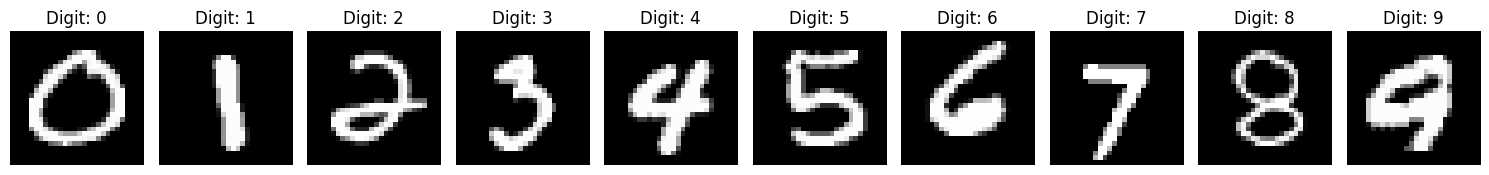

In [ ]:
#Visualization: One sample image for each digit
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
digits = np.unique(y_train)
for ax, digit in zip(axes.flatten(), digits):
    sample_image = x_train[y_train == digit][0]
    ax.imshow(sample_image, cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis("off")
plt.tight_layout()
plt.show()

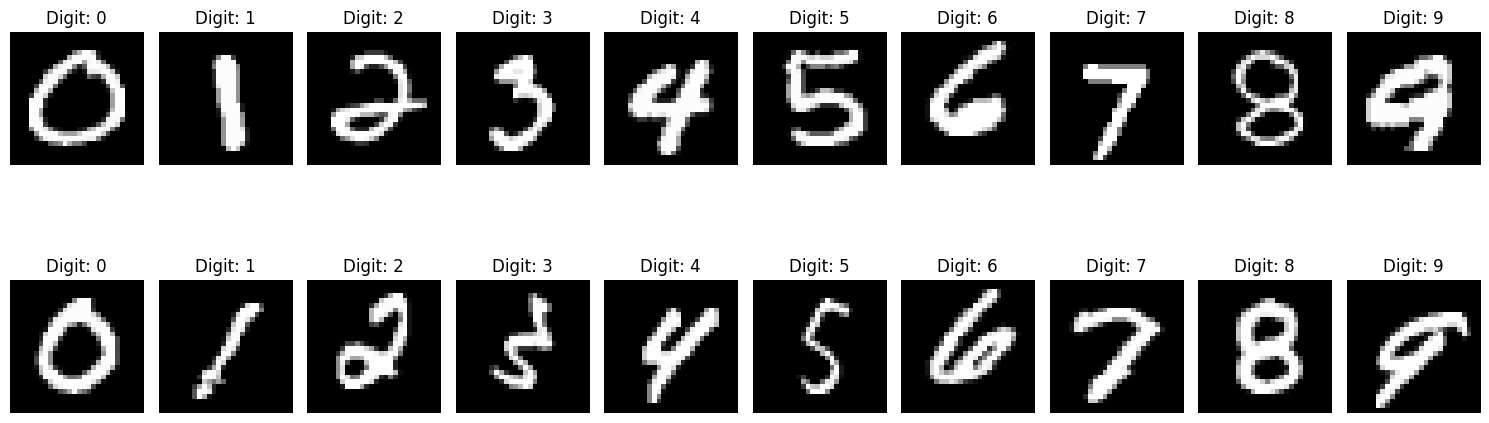

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 2 samples from each digits
fig, axes = plt.subplots(2, 10, figsize=(15, 6))
digits = np.unique(y_train)

for i, digit in enumerate(digits):
    samples = x_train[y_train == digit][:2]  # Take first 2 sample

    for j in range(2):  # It will return 2 times because there are 2 examples
        ax = axes[j, i]
        ax.imshow(samples[j], cmap='gray')
        ax.set_title(f"Digit: {digit}")
        ax.axis("off")

plt.tight_layout()
plt.show()

###  Data Preprocessing

Normalization of the pixel values by using Numpy

In [32]:
# Compute mean and standard deviation across the entire dataset
mean = np.mean(x_train)
std = np.std(x_train)

print("Mean of training set:", mean)
print("Standard deviation of training set:", std)

# Apply normalization: (X - mean) / std
X_train_norm = (x_train - mean) / std
X_val_norm = (x_val - mean) / std
X_test_norm = (x_test - mean) / std

# Verify normalization
print("\nMean before normalization:", np.mean(x_train))
print("Std before normalization:", np.std(x_train))

print("\nMean after NumPy normalization (should be ~0):", np.mean(X_train_norm))
print("Std after NumPy normalization (should be ~1):", np.std(X_train_norm))

Mean of training set: 33.28194106079932
Standard deviation of training set: 78.5240131616269

Mean before normalization: 33.28194106079932
Std before normalization: 78.5240131616269

Mean after NumPy normalization (should be ~0): -2.0636931317258563e-17
Std after NumPy normalization (should be ~1): 1.0000000000000013


**Normalization using Scikit-Learn**

In [54]:
from sklearn.preprocessing import StandardScaler

# Reshape the data to 2D for StandardScaler (flatten each image)
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_val_flat = x_val.reshape(x_val.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

print('X_train Shape', x_train.shape)
print('X_train_flat Shape', X_train_flat.shape)

# Create StandardScaler and fit on "training" data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
# scaler.fit(X_train_flat)
# X_train_scaled = scaler.transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Reshape back to original image shape
X_train_scaled = X_train_scaled.reshape(x_train.shape)
X_val_scaled = X_val_scaled.reshape(x_val.shape)
X_test_scaled = X_test_scaled.reshape(x_test.shape)

print("\nMean after Scikit-Learn normalization (should be ~0):", np.mean(X_train_scaled))
print("Std after Scikit-Learn normalization (should be ~1):", np.std(X_train_scaled))

X_train Shape (48000, 28, 28)
X_train_flat Shape (48000, 784)

Mean after Scikit-Learn normalization (should be ~0): -2.2733138123277016e-19
Std after Scikit-Learn normalization (should be ~1): 0.955649154304235


### Building KNN Classifier

In [36]:
#Reshape images from (num_samples, height, width) → (num_samples, height * width)
#KNN works with 2D Input Data
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_val_flat = X_val_norm.reshape(X_val_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

print('X_train_normalized Shape', X_train_norm.shape)
print('X_train_flat Shape', X_train_flat.shape)

X_train_normalized Shape (48000, 28, 28)
X_train_flat Shape (48000, 784)


In [35]:
#Initialize a k-NN classifier.
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9] # Trying different k values: 1, 3, 5, 7, 9
validation_accuracies = []

best_k = None
best_accuracy = 0

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_val_pred = knn.predict(X_val_flat)
    acc = accuracy_score(y_val, y_val_pred)  # Based on accuracy, find the ideal value using the validation set.
    validation_accuracies.append(acc)
    print(f"Validation accuracy for k={k}: {acc:.4f}")

  # Track for the best model
    if acc > best_accuracy:
      best_k = k
      best_accuracy = acc

print(f"\nBest k={best_k}, Best Validation Accuracy: {best_accuracy:.4f}")

Validation accuracy for k=1: 0.9745
Validation accuracy for k=3: 0.9731
Validation accuracy for k=5: 0.9723
Validation accuracy for k=7: 0.9716
Validation accuracy for k=9: 0.9699

Best k=1, Best Validation Accuracy: 0.9745


Plotting the the number of neighbors and validation accuracy

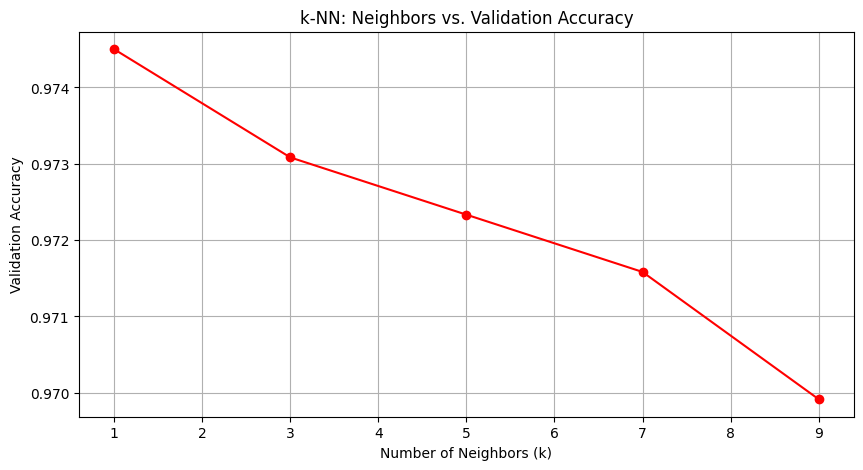

In [ ]:
# Plot validation accuracy vs. k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, validation_accuracies, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title('k-NN: Neighbors vs. Validation Accuracy')
plt.grid(True)
plt.show()

### Final Model Training and Evaluation

Retrain the k-NN classifier using the combination of the training and validation sets with the best hyperparameter.


In [37]:
best_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print(f"Best k value: {best_k}")


Best k value: 1


Evaluate the final model on the test set by reporting Accuracy, Precision, Recall, and F1-score


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train_final = np.concatenate((X_train_flat, X_val_flat), axis=0)
y_train_final = np.concatenate((y_train, y_val), axis=0)

#Train final model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_final, y_train_final)

#Evaluate on test set
y_test_pred = final_knn.predict(X_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

print("\nClassification Report for KNN:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Test Accuracy with Best Hyperparameters: 0.9691

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Generate and visualize a confusion matrix

In [ ]:
#Calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_test_pred)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.9691


Confusion Matrix for KNN:
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]


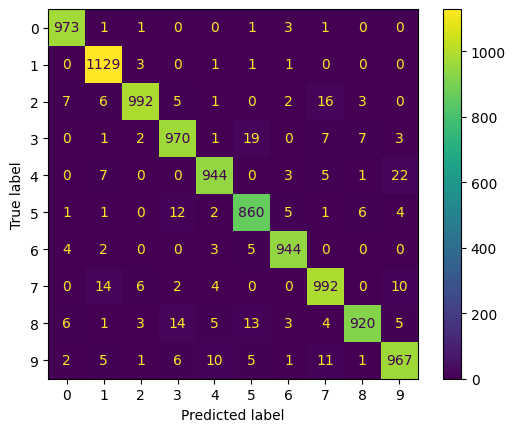

In [ ]:
# Generating a confusion matrix

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for KNN:")
print(cm_knn)

# We can visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)



In [ ]:
#Classification Report

from sklearn.metrics import classification_report

print("Classification Report for KNN:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



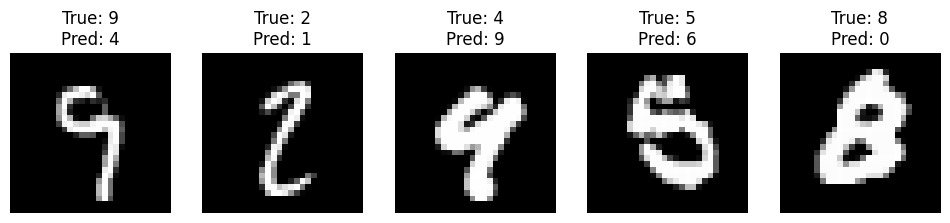

In [49]:
misclassified_idx = np.where(y_test != y_test_pred)[0]

#Randomly select 5 misclassified images
random_indices = np.random.choice(misclassified_idx, size=5, replace=False)

#Plot the misclassified images
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    idx = random_indices[i]
    ax.imshow(x_test[idx].reshape(28,28), cmap='gray')
    ax.set_title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_test_pred[idx]]}")
    ax.axis("off")

plt.show()

##Plotting ROC Curve and Calculating AUC

The ROC curve evaluates performance across different thresholds, making it useful for assessing how well the model distinguishes between classes regardless of class distribution.

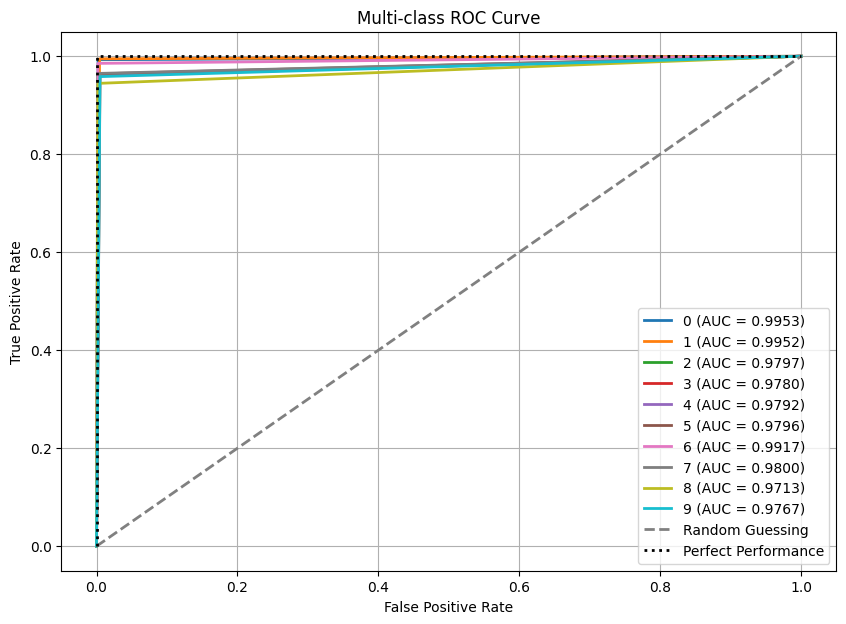

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc_curve(y_true, y_proba, class_names):
    #Binarize the labels for multi-class ROC computation
    y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

    plt.figure(figsize=(10, 7))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", lw=2)

    #Reference lines
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing", lw=2)
    plt.plot([0, 0, 1], [0, 1, 1], linestyle=":", color="black", label="Perfect Performance", lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

y_test_proba = final_knn.predict_proba(X_test_flat)
plot_multiclass_roc_curve(y_test, y_test_proba, class_names)


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grid
param_grid = {
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5]
}
grid_search_cv = 3  # Number of cross-validation folds

# Initialize Decision Tree
tree_classifier = DecisionTreeClassifier(random_state=42)  # Ensuring reproducibility

grid_search = GridSearchCV(
    estimator=tree_classifier,
    param_grid=param_grid,
    cv=grid_search_cv,
    scoring='accuracy'
)

# Grid search internally splits the training data for cross-validation,
# so we can directly use the full training set (no need for separate validation data)
grid_search.fit(X_train_final, y_train_final)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8501


## Evaluation

Evaluate the final model on the test set by reporting Accuracy, Precision, Recall, and F1-score

In [ ]:
best_tree_classifier = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)

best_tree_classifier.fit(X_train_final, y_train_final)
y_pred_best_tree = best_tree_classifier.predict(X_test_flat)

print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred_best_tree, target_names=class_names))

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



Generate a confusion matrix and provide an analysis of the results

Confusion Matrix for Decision Tree:
[[ 918    0   10    8    6   11    7    4   13    3]
 [   1 1089   12   13    2    5    2    1   10    0]
 [  15   11  864   20   22    8   12   34   35   11]
 [   7    5   39  845    6   47    2   19   23   17]
 [   3    4    7    7  833    7   12    8   28   73]
 [  16    9    5   51   14  717   20    8   29   23]
 [  23    5   13    7   34   17  833    3   21    2]
 [   2   14   26   10   10    5    0  906   11   44]
 [   9   10   30   40   14   21   19    9  791   31]
 [  13    2    8   32   24   14    5   13   31  867]]


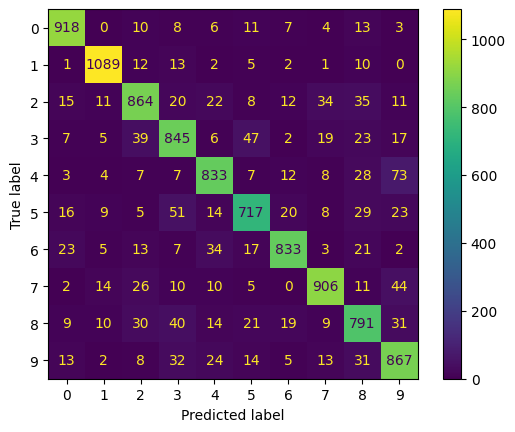

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_best_tree)
print("Confusion Matrix for Decision Tree:")
print(cm_knn)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_best_tree)

Plotting ROC Curve and Calculating AUC


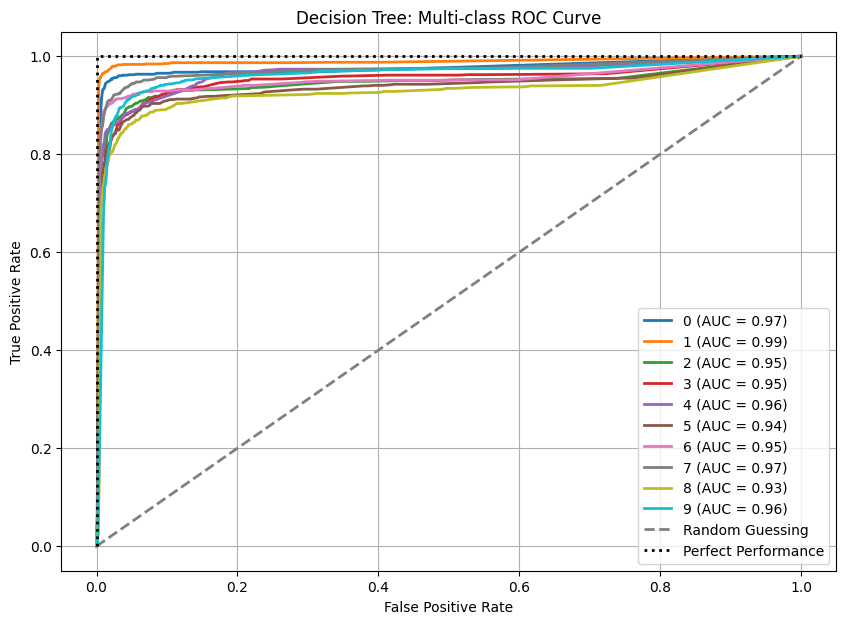

In [ ]:
def plot_multiclass_roc_curve_dt(y_true, y_proba, class_names):
    #Binarize the labels for multi-class ROC computation
    y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

    plt.figure(figsize=(10, 7))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})", lw=2)

    #Reference lines
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing", lw=2)
    plt.plot([0, 0, 1], [0, 1, 1], linestyle=":", color="black", label="Perfect Performance", lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Decision Tree: Multi-class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

#Compute probabilities and plot ROC curve
y_test_proba_dt= best_tree_classifier.predict_proba(X_test_flat)
plot_multiclass_roc_curve_dt(y_test, y_test_proba_dt, class_names)
